In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [26]:
AH = pd.read_csv('tips.csv', sep=",", header=0, index_col=False)

In [29]:

# print('Вопрос №1. Сколько мужчин и сколько женщин заплатили чаевые?')
print()
print(str((AH['sex'][AH['tip'] > 0].value_counts()['Male'])) + ' мужчин заплатили чаевые')
print(str((AH['sex'][AH['tip'] > 0].value_counts()['Female'])) + ' женщин заплатили чаевые')


155 мужчин заплатили чаевые
86 женщин заплатили чаевые


In [30]:
# Определите долю курящих среди мужчин и женщин.
print('Вопрос №2. Определите долю курящих мужчин и женщин')
# Доля курящих мужчин
print(('Доля курящих мужчин равна ' + str(round(AH['sex'][AH['smoker'] == 'Yes'].value_counts()['Male'] / AH['sex'].value_counts()['Male'], 2))))
# Доля курящих женщин
print(('Доля курящих женщин равна ' + str(round(AH['sex'][AH['smoker'] == 'Yes'].value_counts()['Female'] / AH['sex'].value_counts()['Female'], 2))))

Вопрос №2. Определите долю курящих мужчин и женщин
Доля курящих мужчин равна 0.38
Доля курящих женщин равна 0.38


In [31]:
print('Вопрос №3. В какой день недели в среднем было максимальное количество посетителей? Учитывайте размер столика?')

# Пишем в массив уникальные элементы столбца DAY, так как изначально датасет содержит 4 из 7 дней недели и может быть изменён
all_days_list = AH['day'].unique()
# Перебираем массив all_days_list
for i in range(0, len(all_days_list)):
    print('В день недели ' + str(all_days_list[i]) + ' в среднем было ' + str(round(AH['size'][AH['day'] == all_days_list[i]].mean(), 1)) + ' посетителей')


Вопрос №3. В какой день недели в среднем было максимальное количество посетителей? Учитывайте размер столика?
В день недели Sun в среднем было 2.8 посетителей
В день недели Sat в среднем было 2.5 посетителей
В день недели Thur в среднем было 2.5 посетителей
В день недели Fri в среднем было 2.1 посетителей


In [33]:
print('Вопрос №4. На какое время суток приходится наибольшее количество чаевых?')
# Та же фича, что и с днями недели в датасете, только по времени дня
all_time_list = AH['time'].unique()
for i in range(0, len(all_time_list)):
    print('Во время ' + str(all_time_list[i]) + ' в среднем было ' + str(round(AH['tip'][AH['time'] == all_time_list[i]].mean(), 1)) + ' рублей чаевых')

Вопрос №4. На какое время суток приходится наибольшее количество чаевых?
Во время Dinner в среднем было 3.0 рублей чаевых
Во время Lunch в среднем было 2.7 рублей чаевых


In [35]:
print()
print('Вопрос №5. В какой день недели был заказ к максимальным счётом?')

max_total_bill = AH['total_bill'].max()
max_total_bill_day = AH[AH['total_bill'] == max_total_bill]['day']

print('Заказ с максимальным счётом пришёлся на ' + str(max_total_bill_day.values[0]) + ' и составил ' + str(max_total_bill) + ' рублей')


Вопрос №5. В какой день недели был заказ к максимальным счётом?
Заказ с максимальным счётом пришёлся на Sat и составил 100.18 рублей



Вопрос №6. Построить столбчатую диаграмму, где данные сгруппированы по дню недели и медианному значению общего счёта

AxesSubplot(0.125,0.125;0.775x0.755)


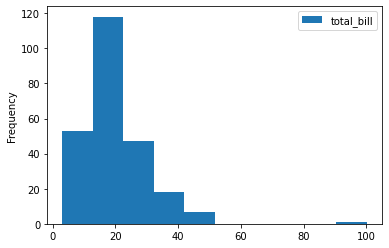

In [41]:
print()
print('Вопрос №6. Построить столбчатую диаграмму, где данные сгруппированы по дню недели и медианному значению общего счёта')
print()
# https://python-scripts.com/plot-with-pandas#histograms ДОКУМЕНТАЦИЯ ПО ГРАФИКАМ
print(AH.plot(x='tip', y=['total_bill'], kind='hist'))